Machine learning: Location-based Analysis

Task: Location-based Analysis
• Objective: Perform a geographical analysis of the restaurants in the dataset.
• Steps:
• Explore the latitude and longitude coordinates of the restaurants and visualize their distribution on a map.
• Group the restaurants by city or locality and analyze the concentration of restaurants in different areas.
• Calculate statistics such as the average ratings, cuisines, or price ranges by city or locality.
• Identify any interesting insights or patterns related to the locations of the restaurants.

Importing python libraries and datasets:

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import folium


Data analysis:

In [99]:
dataset = pd.read_csv('/content/Dataset .csv')
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [101]:
dataset.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Checking for null values:

In [102]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Removing null values:

In [103]:
dataset['Cuisines'].fillna(dataset['Cuisines'].median,inplace=True)

In [104]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [105]:
dataset.shape

(9551, 21)

Checking for duplicates:

In [106]:
dataset.duplicated().sum()

0

Displaying column names:

In [107]:
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

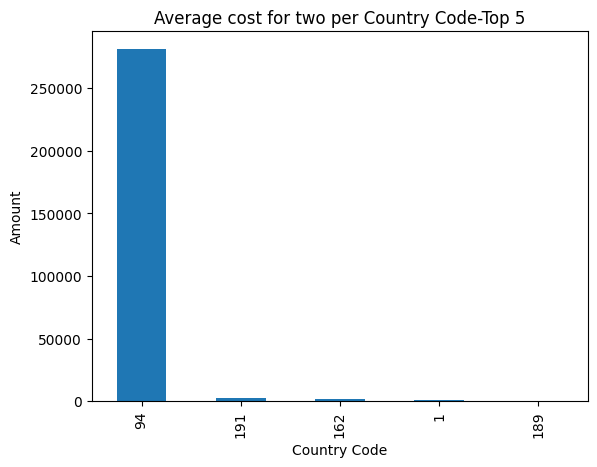

In [108]:
dataset.groupby("Country Code")["Average Cost for two"].mean().sort_values(ascending=False).head().plot(kind="bar")
plt.title("Average cost for two per Country Code-Top 5")
plt.xlabel("Country Code")
plt.ylabel("Amount")
plt.show()

Split the Data into Training and Testing Sets:

In [109]:
dataset

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [110]:
x = dataset.drop('Aggregate rating', axis=1)
y = dataset['Aggregate rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
print("\nTraining and Testing Sets:")
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



Training and Testing Sets:
X_train shape: (7640, 20)
X_test shape: (1911, 20)
y_train shape: (7640,)
y_test shape: (1911,)


In [111]:
categorical_columns = ['Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Rating color', 'Rating text', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for col in categorical_columns:
    if any(callable(item) for item in dataset[col]):
        print(f"Warning: Column '{col}' contains methods. Converting them to strings.")
        dataset[col] = dataset[col].astype(str)
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
dataset

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",171,172,121.027535,14.565443,921,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",593,601,121.014101,14.553708,1112,...,0,1,0,0,0,3,4.5,0,1,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",308,314,121.056831,14.581404,1672,...,0,1,0,0,0,4,4.4,1,5,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",862,875,121.056475,14.585318,1127,...,0,0,0,0,0,4,4.9,0,1,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",862,875,121.057508,14.584450,1123,...,0,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",517,523,28.977392,41.022793,1814,...,11,0,0,0,0,3,4.1,1,5,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",552,558,29.041297,41.009847,1825,...,11,0,0,0,0,3,4.2,1,5,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",554,561,29.034640,41.055817,1111,...,11,0,0,0,0,4,3.7,5,2,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",554,561,29.036019,41.057979,1658,...,11,0,0,0,0,4,4.0,1,5,901


In [112]:
label_encoder = LabelEncoder()
dataset['Cuisines'] = label_encoder.fit_transform(dataset['Cuisines'])
dataset['Price range'] = label_encoder.fit_transform(dataset['Price range'])
print("\nEncoded Dataset:")
print(dataset.head())

scaler = StandardScaler()

dataset[['Aggregate rating']] = scaler.fit_transform(dataset[['Aggregate rating']])

print("\nNormalized Dataset:")
print(dataset.head())


Encoded Dataset:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  Locality  \
0  Third Floor, Century City Mall, Kalayaan Avenu...       171   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...       593   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...       308   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...       862   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...       862   

   Locality Verbose   Longitude   Latitude  Cuisines  ...  Currency  \
0               172  121.027535  14.565443       921  ...

In [113]:
map_center = [dataset["Latitude"].mean(), dataset["Longitude"].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)


for idx, row in dataset.iterrows():
    folium.Marker([row["Latitude"], row["Longitude"]], popup=row['Restaurant Name']).add_to(restaurant_map)

map_center = [dataset["Latitude"].mean(), dataset["Longitude"].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=1)

for idx, row in dataset.iterrows():
    folium.Marker([row["Latitude"], row["Longitude"]]).add_to(restaurant_map)

restaurant_map

In [114]:
grouped_by_city = dataset.groupby("City").size().reset_index(name='count')
grouped_by_city


,City,count
0,Abu Dhabi,20
1,Agra,20
2,Ahmedabad,21
3,Albany,20
4,Allahabad,20
...,...,...
136,Weirton,1
137,Wellington City,20
138,Winchester Bay,1
139,Yorkton,1


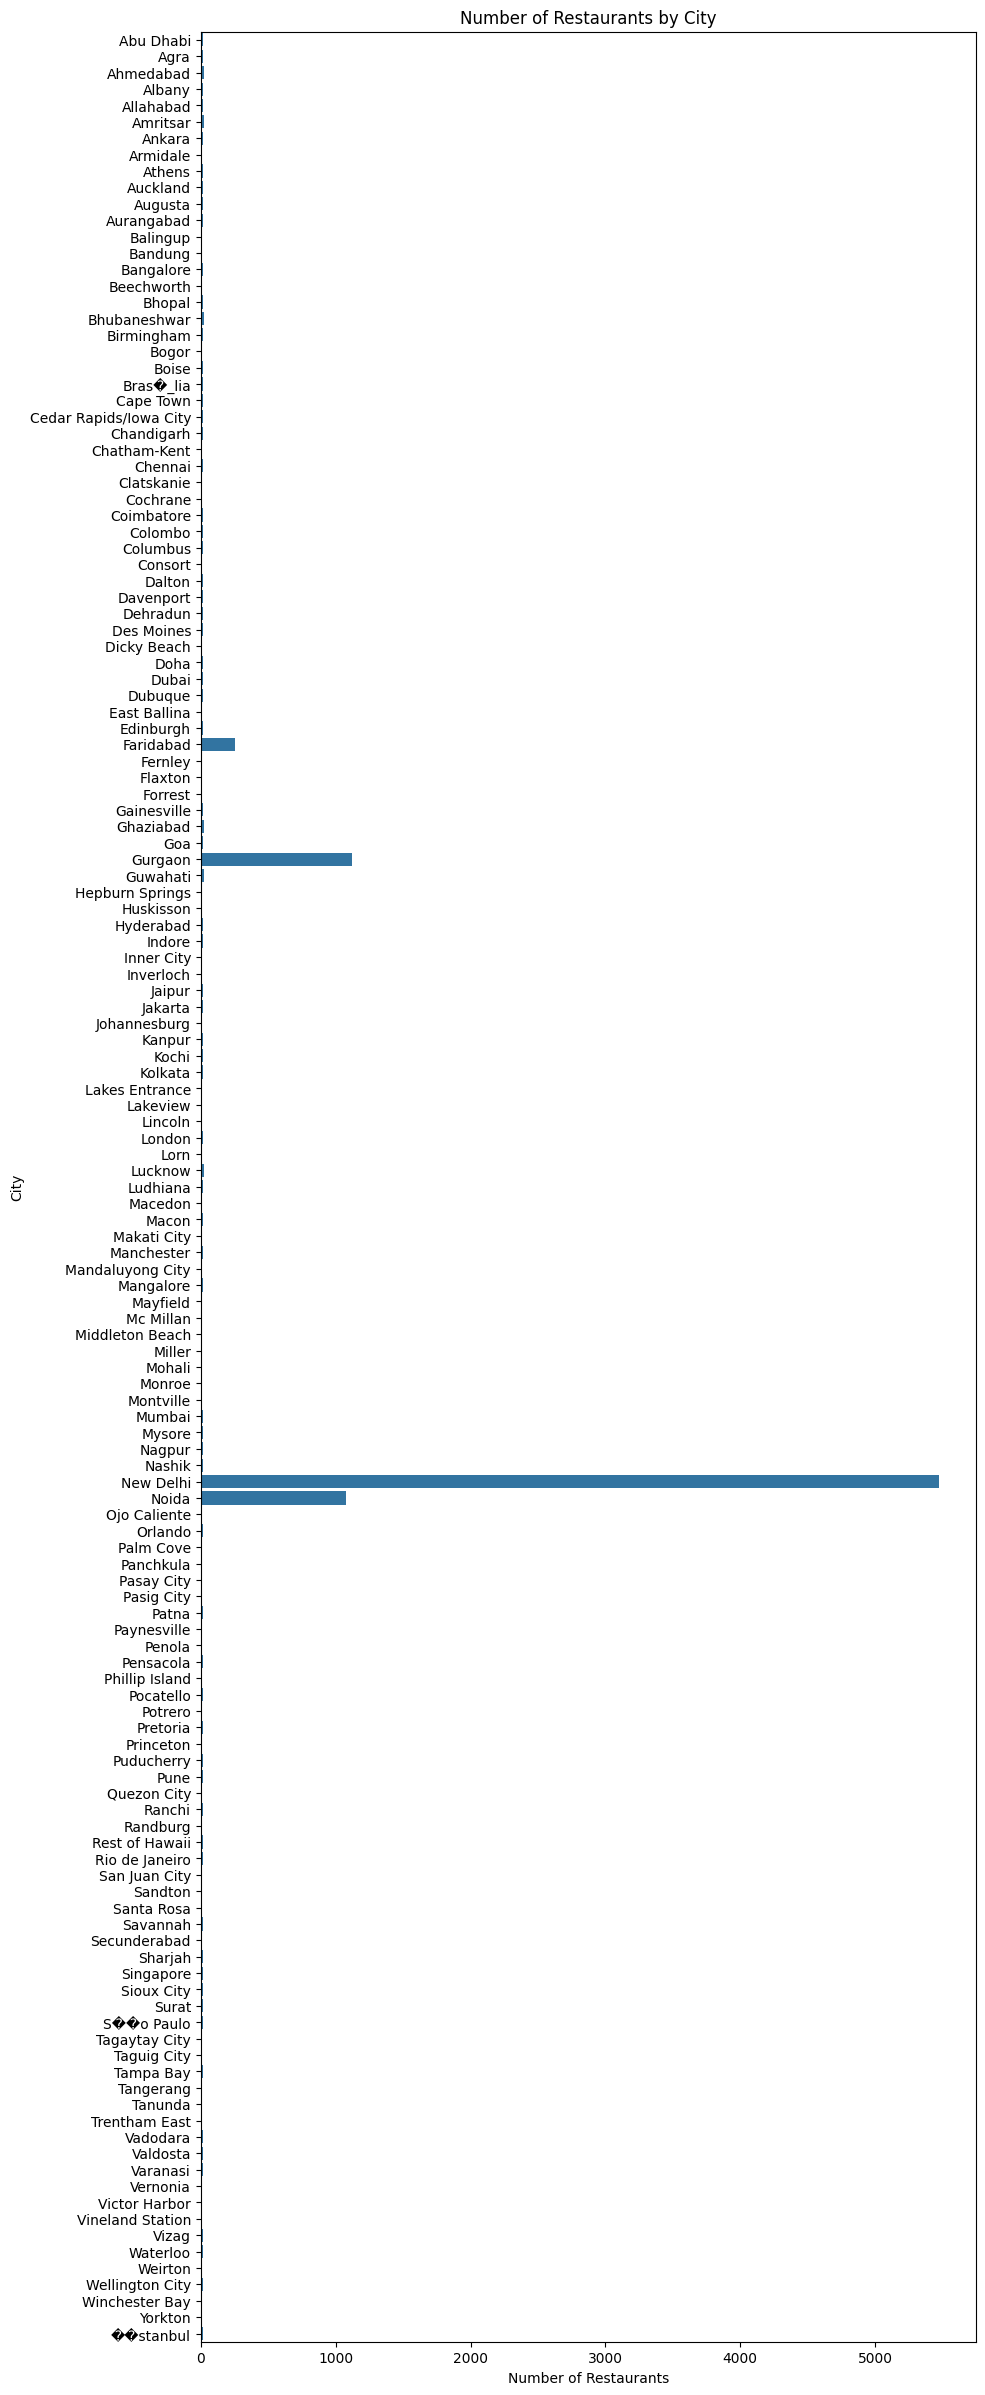

In [115]:
plt.figure(figsize=(10, 30))
sns.barplot(x='count', y="City", data=grouped_by_city)
plt.title('Number of Restaurants by City')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()


In [116]:
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

<ipython-input-117-af284335802a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Aggregate rating', y="City", data=average_ratings_by_city, palette=colors)
<ipython-input-117-af284335802a>:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  barplot = sns.barplot(x='Aggregate rating', y="City", data=average_ratings_by_city, palette=colors)


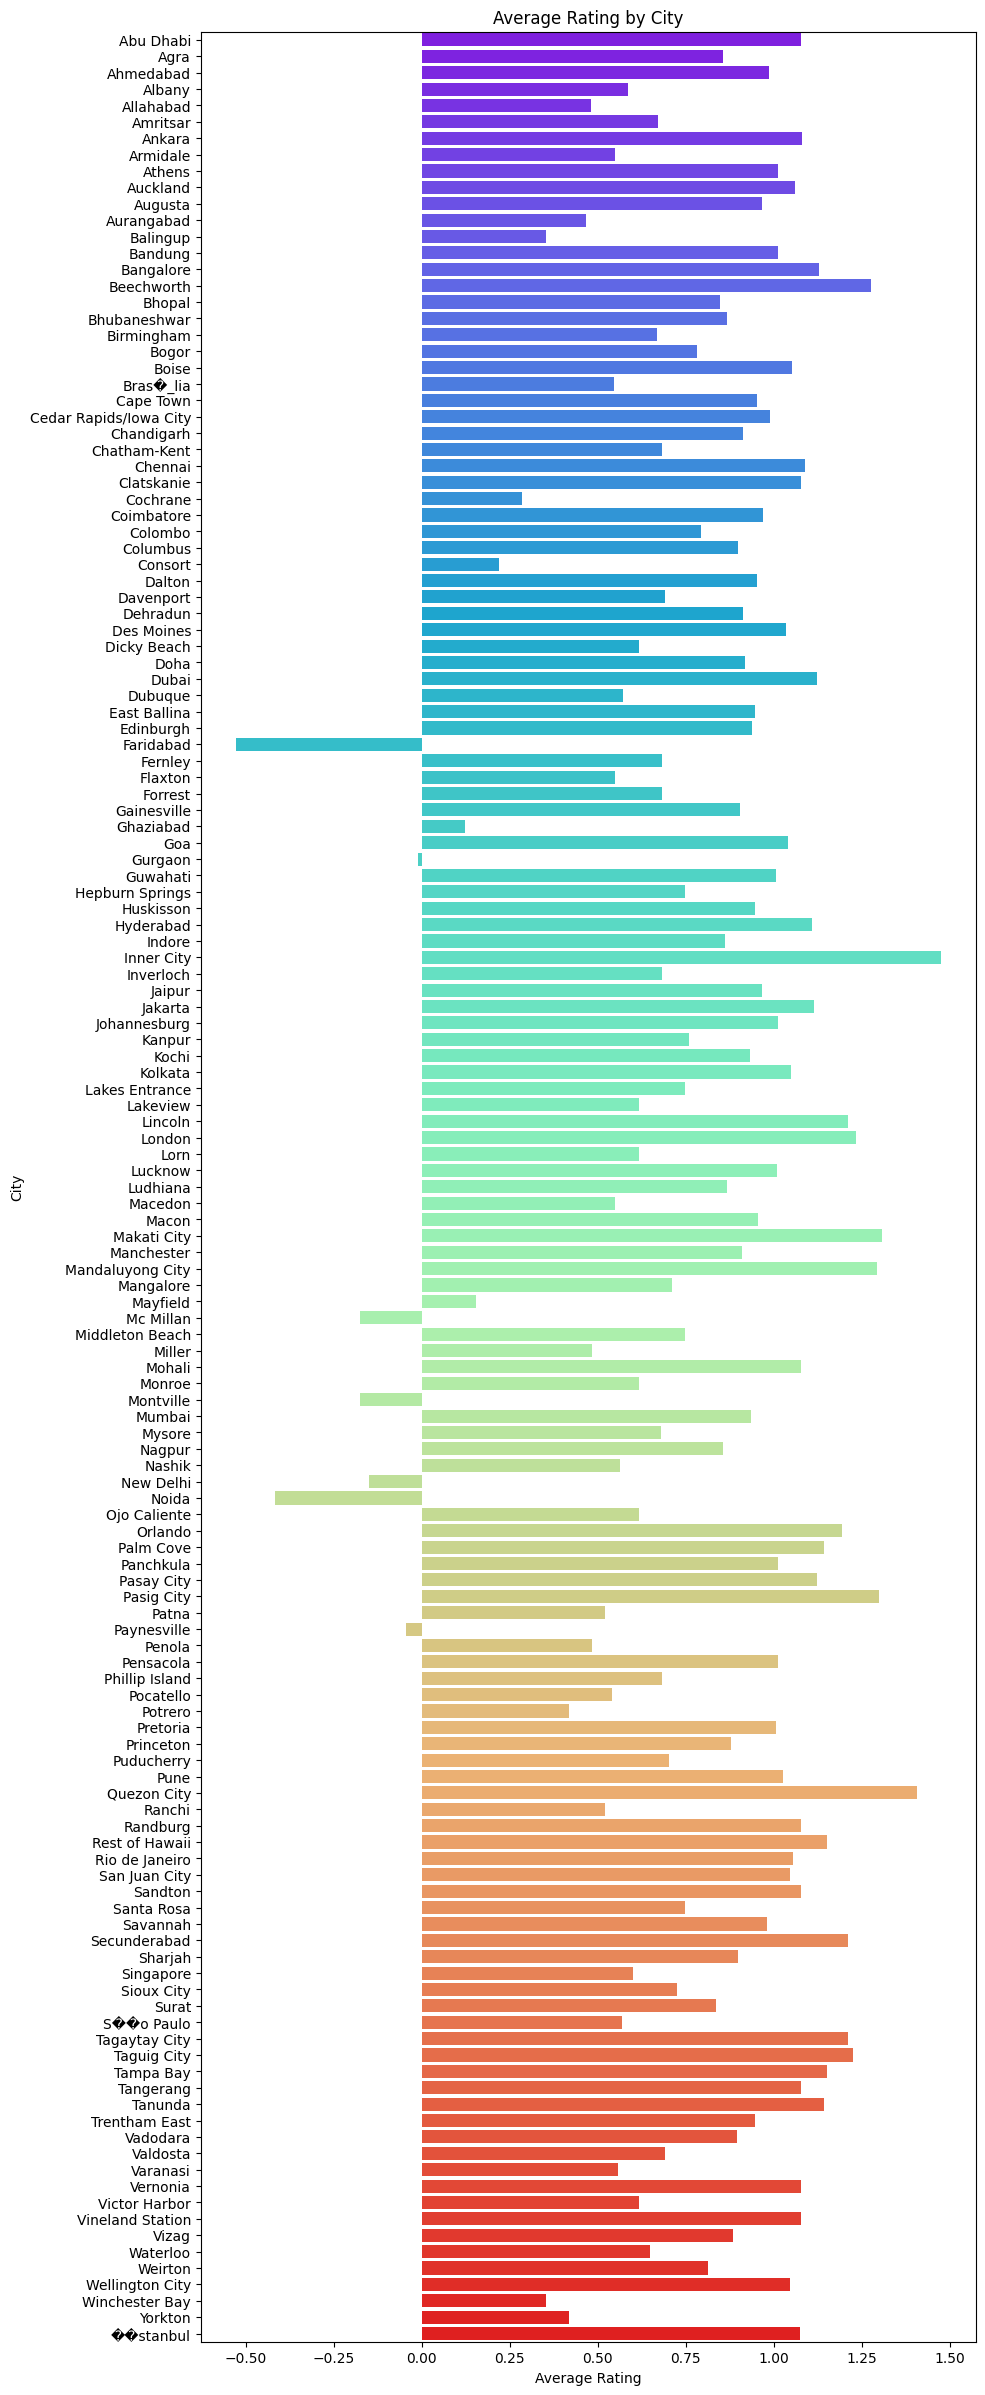

In [117]:
num_colors = len(average_ratings_by_city)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))
plt.figure(figsize=(10, 30))
barplot = sns.barplot(x='Aggregate rating', y="City", data=average_ratings_by_city, palette=colors)

plt.title('Average Rating by City')
plt.xlabel('Average Rating')
plt.ylabel('City')

plt.show()

In [118]:
top_cities_by_rating = city_statistics.sort_values(by='Aggregate rating', ascending=False).head(10)
print("Top Cities by Average Rating:")
top_cities_by_rating


Top Cities by Average Rating:


,City,count,Aggregate rating,Price range
56,Inner City,2,1.473081,3.00
107,Quezon City,1,1.407131,2.00
73,Makati City,2,1.308206,2.00
95,Pasig City,3,1.297214,2.00
75,Mandaluyong City,4,1.291718,2.75
15,Beechworth,1,1.275231,1.00
67,London,20,1.232363,2.00
123,Taguig City,4,1.225768,2.50
66,Lincoln,1,1.209281,1.00
122,Tagaytay City,1,1.209281,2.00


<ipython-input-119-8724b2387b3e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y="City", data=top_cities_by_rating, palette='viridis')


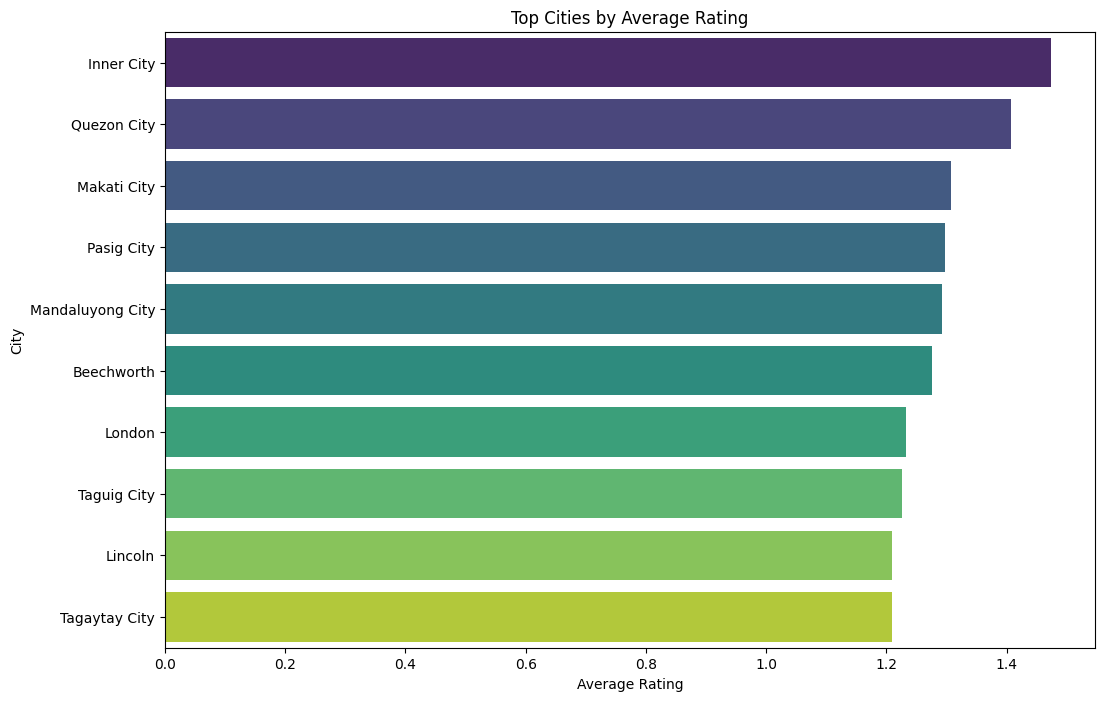

In [119]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregate rating', y="City", data=top_cities_by_rating, palette='viridis')
plt.title('Top Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()


Top Cities by Average Price Range:


<ipython-input-120-c13f2f12e272>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price range', y="City", data=top_cities_by_price, palette='viridis')


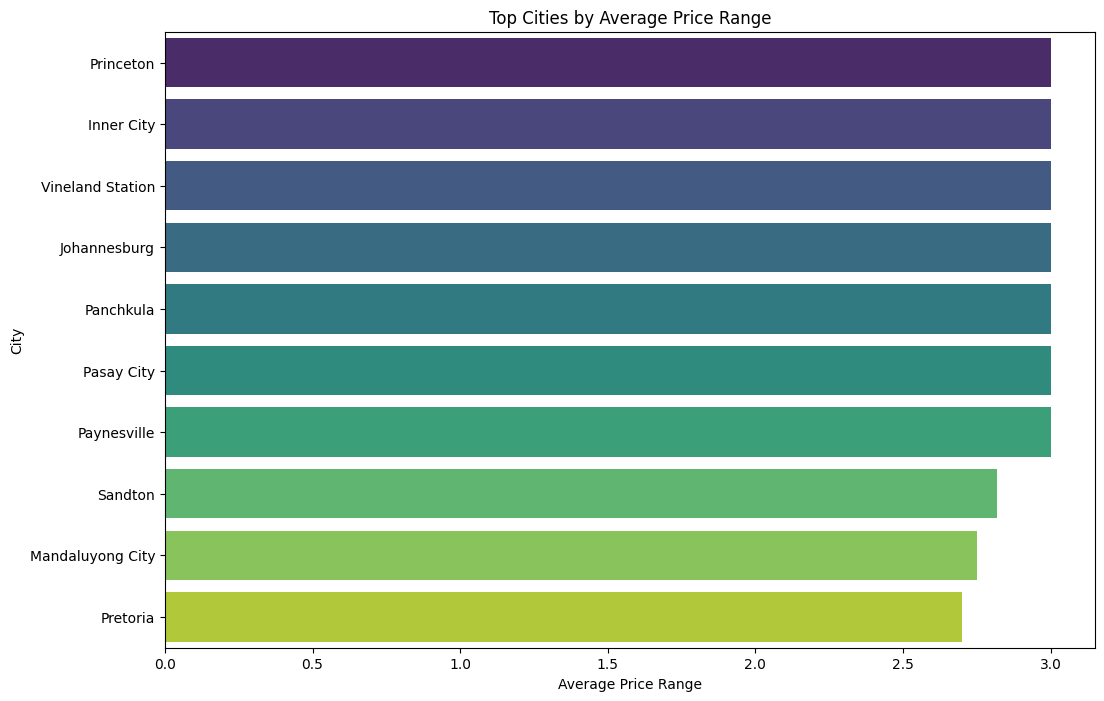

In [120]:
top_cities_by_price = city_statistics.sort_values(by='Price range', ascending=False).head(10)
print("Top Cities by Average Price Range:")
top_cities_by_price
plt.figure(figsize=(12, 8))
# Pass the DataFrame 'top_cities_by_price' to the 'data' parameter
sns.barplot(x='Price range', y="City", data=top_cities_by_price, palette='viridis')
plt.title('Top Cities by Average Price Range')
plt.xlabel('Average Price Range')
plt.ylabel('City')
plt.show()

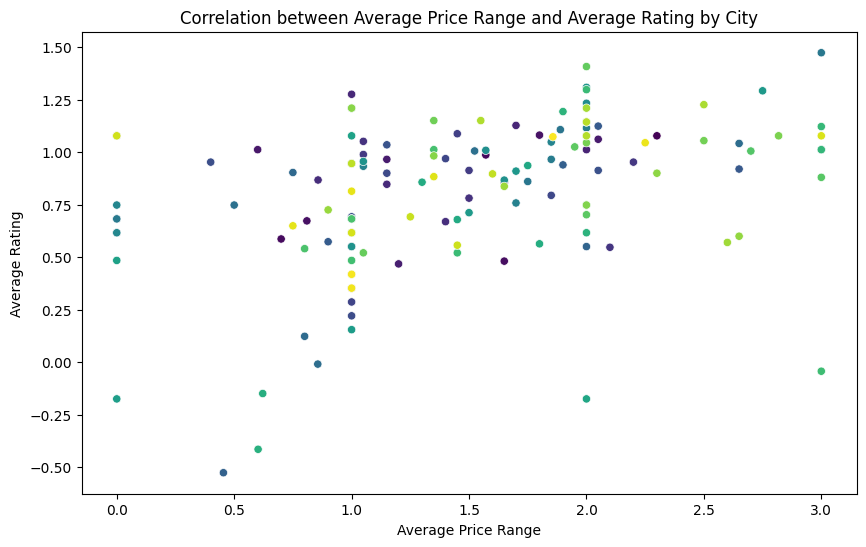

In [121]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price range', y='Aggregate rating', data=city_statistics, hue="City", palette='viridis', legend=False)
plt.title('Correlation between Average Price Range and Average Rating by City')
plt.xlabel('Average Price Range')
plt.ylabel('Average Rating')
plt.show()